# Let's explore EXFOR offerings for Ca48

In [1]:
import pickle
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import exfor_tools
import jitr

Using database version x4i3_X4-2023-04-29 located in: /home/beyerk/mambaforge/envs/sage/lib/python3.11/site-packages/x4i3/data


In [3]:
proton = (1, 1)
neutron = (1, 0)

In [4]:
Zr90 = (90, 40)

In [5]:
all_entries_pp = exfor_tools.get_exfor_differential_data(
    target=Zr90,
    projectile=(1, 1),
    quantity="dXS/dA",
    product="EL",
    energy_range=[10, 200],  # MeV
)

In [6]:
# these are considered outliers or not useful
entries_to_ignore = []
for entry in entries_to_ignore:
    del all_entries_pp[entry]

In [7]:
all_entries_pp

{'C0085': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7bbd579400d0>,
 'C0893': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7bbd57806010>,
 'D0295': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7bbd574ab610>,
 'E0166': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7bbd5716e110>,
 'O0032': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7bbd5762eb50>,
 'O0049': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7bbd5707d890>,
 'O0208': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7bbd56c0ee10>,
 'O0211': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7bbd56b56b50>,
 'O0351': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7bbd569a5c90>,
 'O0372': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7bbd56c670d0>,
 'O0389': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7bbd56d775d0>,
 'O0391': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7bbd56ec0250>,
 'T0101': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7bbd577ad490>}

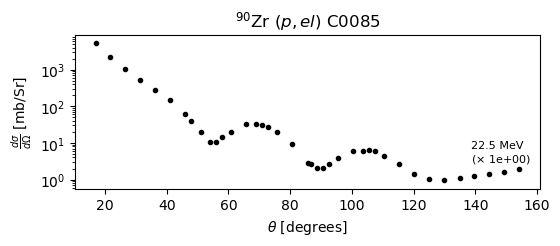

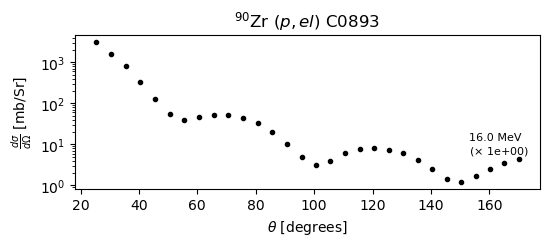

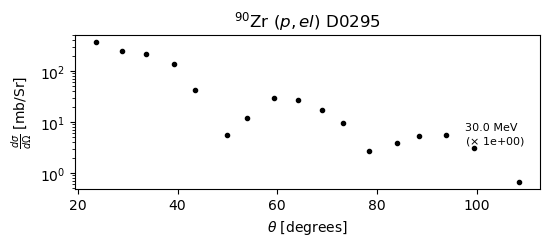

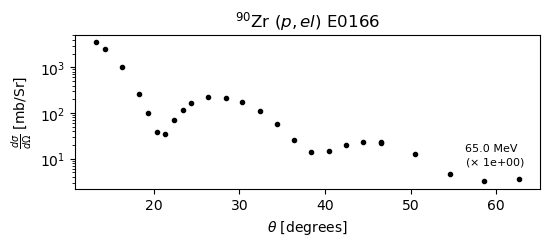

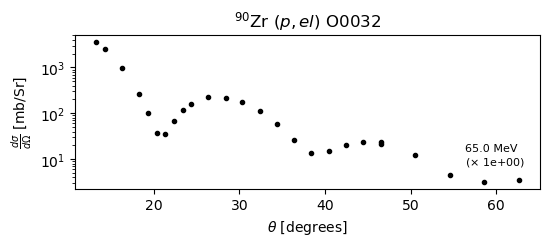

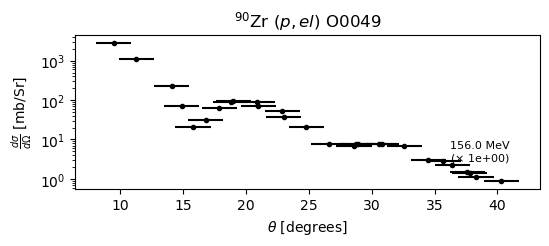

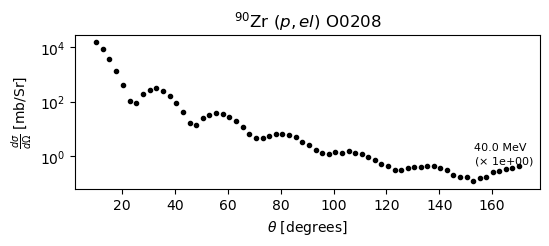

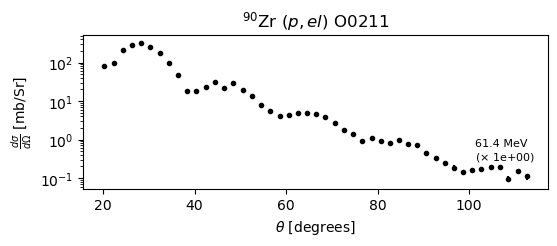

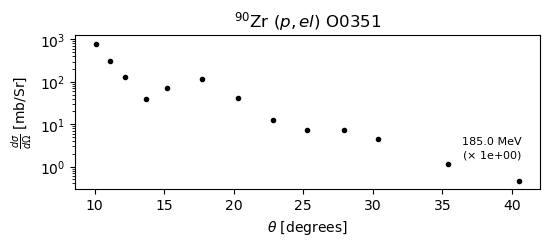

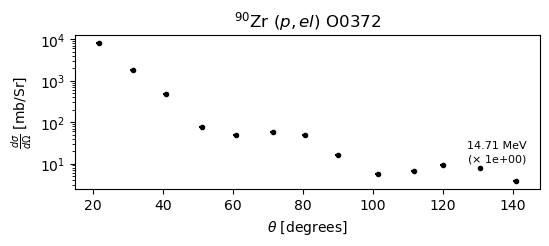

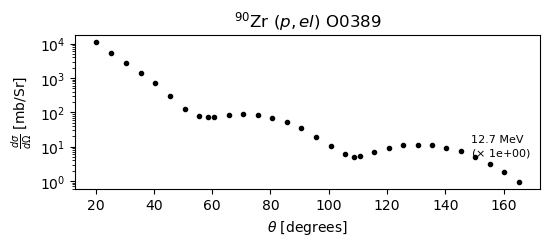

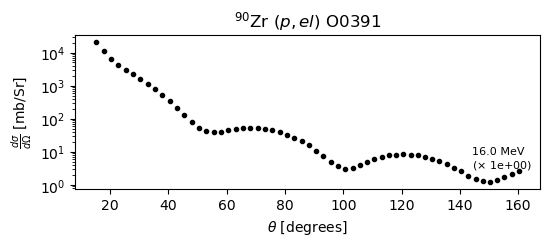

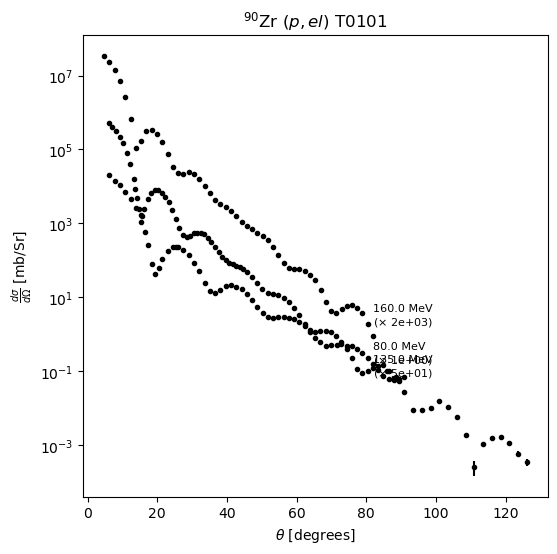

In [17]:
for entry, data in all_entries_pp.items():
    
    N = len(data.measurements)
    fig, ax = plt.subplots(1, 1, figsize=(6, 2*N))

    data.plot_experiment(
        ax,
        xlim=None,
        offsets=50,
        label_energy_err=False,
        label_hloc_deg=np.max(data.measurements[0].data[0,:])*0.9,
    )
    ax.set_title(f"{data.fancy_label} {entry}")

In [9]:
all_entries_pp_ruth = exfor_tools.get_exfor_differential_data(
    target=Zr90,
    projectile=(1, 1),
    quantity="dXS/dRuth",
    product="EL",
    energy_range=[10, 200],  # MeV
)

In [10]:
all_entries_pp_ruth

{'F0733': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7bbd55f65150>,
 'O0211': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7bbd57094390>,
 'O0300': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7bbd56b2df10>,
 'O0328': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7bbd56411110>,
 'O0370': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7bbd563ac710>,
 'O0389': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7bbd55dee150>,
 'O0788': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7bbd558e1e50>,
 'O1825': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7bbd55a7be50>}

In [11]:
# these are considered outliers or not useful
entries_to_ignore = []
for entry in entries_to_ignore:
    del all_entries_pp_ruth[entry]

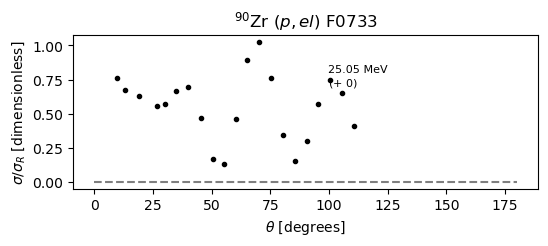

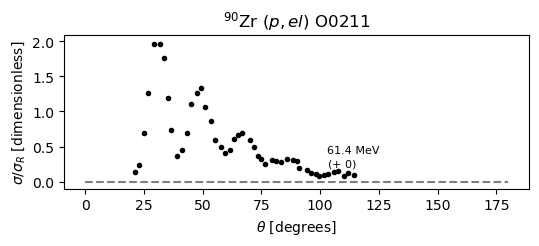

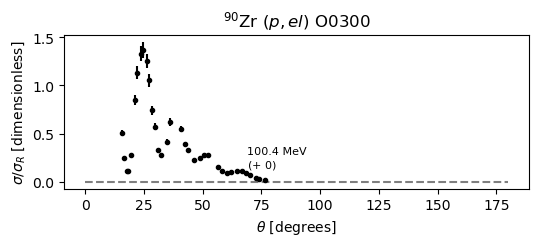

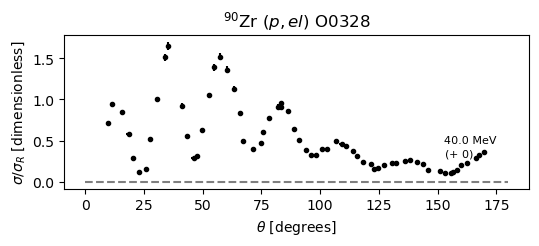

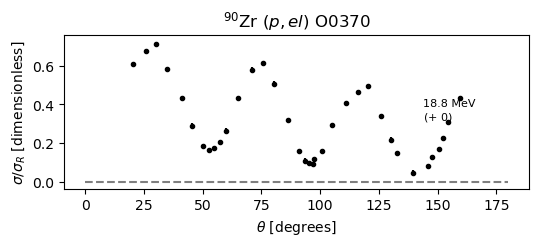

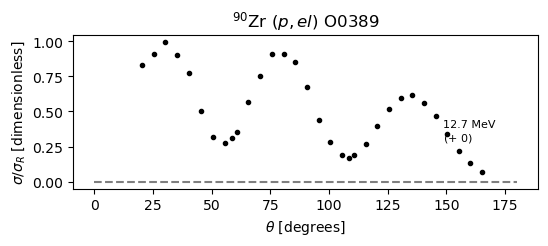

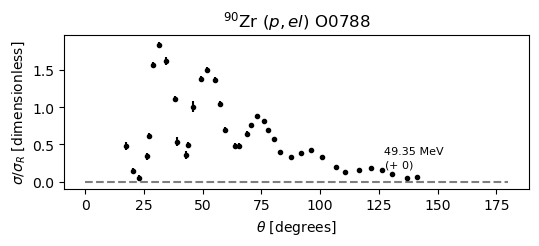

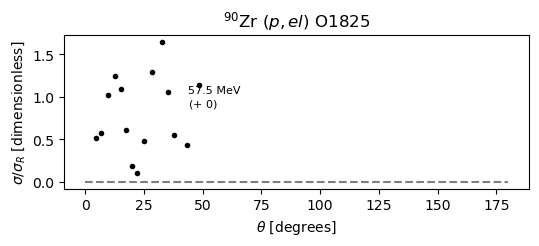

In [16]:
for entry, data in all_entries_pp_ruth.items():
    
    N = len(data.measurements)
    fig, ax = plt.subplots(1, 1, figsize=(6, 2*N))

    data.plot_experiment(
             ax,
        xlim=None,
        offsets=10,
        label_energy_err=False,
        label_hloc_deg=np.max(data.measurements[0].data[0,:])*0.9,
        label_offset_factor=0.1,
        log=False,
        add_baseline=True,
    )
    ax.set_title(f"{data.fancy_label} {entry}")

In [13]:
all_entries_nn = exfor_tools.get_exfor_differential_data(
    target=Zr90,
    projectile=(1, 0),
    quantity="dXS/dA",
    product="EL",
    energy_range=[10, 200],  # MeV
)

In [30]:
all_entries_nn

{'11611': <exfor_tools.exfor_tools.ExforDifferentialData at 0x787811f05850>,
 '12785': <exfor_tools.exfor_tools.ExforDifferentialData at 0x787811f05390>,
 '12996': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7878101410d0>,
 '13946': <exfor_tools.exfor_tools.ExforDifferentialData at 0x787811415290>,
 '14303': <exfor_tools.exfor_tools.ExforDifferentialData at 0x78781203be50>}

In [14]:
# these are considered outliers or not useful
entries_to_ignore = []
for entry in entries_to_ignore:
    del all_entries_nn[entry]

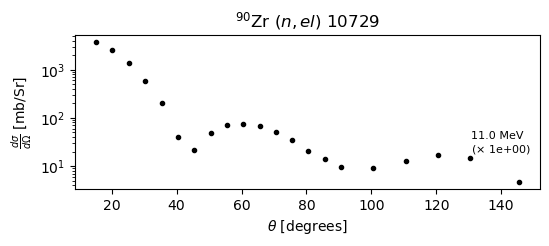

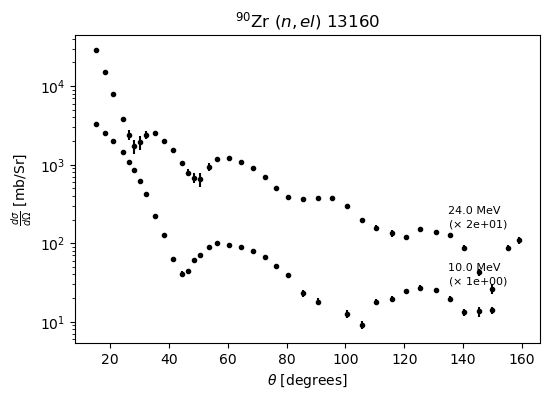

In [15]:
for entry, data in all_entries_nn.items():
    
    N = len(data.measurements)
    fig, ax = plt.subplots(1, 1, figsize=(6, 2*N))

    data.plot_experiment(
        ax,
        xlim=None,
        offsets=20,
        label_energy_err=False,
        label_hloc_deg=np.max(data.measurements[0].data[0,:])*0.9,
    )
    ax.set_title(f"{data.fancy_label} {entry}")